In [11]:
# full code

import keras
from keras import models, layers
from keras import backend

class CNN(models.Sequential):
    def __init__(self, input_shape, num_classes):
        super().__init__()
        
        self.add(layers.Conv2D(32, kernel_size=(3,3),
                               activation='relu',
                               input_shape=input_shape))
        
        self.add(layers.Conv2D(64, (3, 3), activation='relu'))
        self.add(layers.MaxPooling2D(pool_size=(2, 2)))
        self.add(layers.Dropout(0.25))
        self.add(layers.Flatten())
        
        self.add(layers.Dense(128, activation='relu'))
        self.add(layers.Dropout(0.5))
        self.add(layers.Dense(num_classes, activation='softmax'))
        
        self.compile(loss=keras.losses.categorical_crossentropy,
                     optimizer='rmsprop',
                     metrics=['accuracy'])

In [12]:
from keras import datasets

class DATA():
    def __init__(self):
        num_classes = 10
        
        (x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
        img_rows, img_cols = x_train.shape[1:]
        
        if backend.image_data_format() == 'channels_first':
            x_train = x_train.reshape(x_train.shape[0], 1,
                                      img_rows, img_cols)
            x_test = x_test.reshape(x_test.shape[0], 1,
                                    img_rows, img_cols)
            input_shape = (1, img_rows, img_cols)
        
        else:
            x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
            x_test = x_test.reshape(x_test.shape[0], img_rows,
                                    img_cols, 1)
            input_shape = (img_rows, img_cols, 1)
            
        x_train = x_train.astype('float32')
        x_test = x_test.astype('float32')
        x_train = x_train/255.0
        x_test = x_test/255.0
        
        y_train = keras.utils.to_categorical(y_train, num_classes)
        y_test = keras.utils.to_categorical(y_test, num_classes)
        
        self.input_shape = input_shape
        self.num_classes = num_classes
        self.x_train, self.y_train = x_train, y_train
        self.x_test, self.y_test = x_test, y_test

In [15]:
from keraspp.skeras import plot_loss, plot_acc
import matplotlib.pyplot as plt

def main():
    epochs = 10
    batch_size = 128
    data = DATA()
    model = CNN(data.input_shape, data.num_classes)
    
    history = model.fit(data.x_train, data.y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_split=0.2)
    score = model.evaluate(data.x_test, data.y_test)
    print()
    print('Test loss: ', score[0])
    print('Test accuracy: ', score[1])
    
    plot_acc(history)
    plt.show()
    plot_loss(history)
    plt.show()
     

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 44s 916us/step - loss: 0.2311 - accuracy: 0.9286 - val_loss: 0.0600 - val_accuracy: 0.9824
Epoch 2/10
48000/48000 [==============================] - 41s 861us/step - loss: 0.0841 - accuracy: 0.9761 - val_loss: 0.0486 - val_accuracy: 0.9862
Epoch 3/10
48000/48000 [==============================] - 41s 864us/step - loss: 0.0632 - accuracy: 0.9819 - val_loss: 0.0420 - val_accuracy: 0.9873
Epoch 4/10
48000/48000 [==============================] - 42s 876us/step - loss: 0.0533 - accuracy: 0.9838 - val_loss: 0.0438 - val_accuracy: 0.9877
Epoch 5/10
48000/48000 [==============================] - 45s 932us/step - loss: 0.0477 - accuracy: 0.9863 - val_loss: 0.0448 - val_accuracy: 0.9879
Epoch 6/10
48000/48000 [==============================] - 44s 922us/step - loss: 0.0432 - accuracy: 0.9867 - val_loss: 0.0389 - val_accuracy: 0.9887
Epoch 7/10
48000/48000 [==============================] 

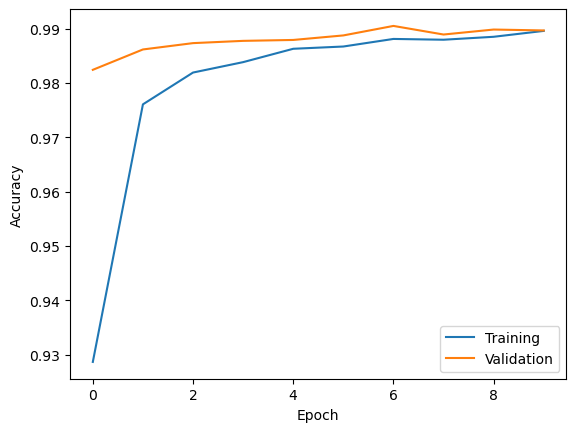

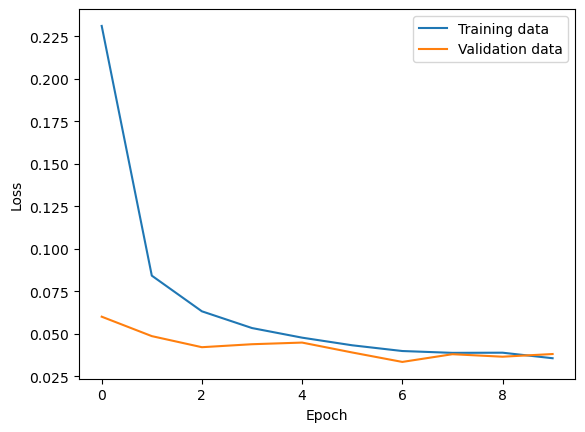

In [16]:
if __name__ =='__main__':
    main()